> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (analyzing gun data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
## 1- Which state has a higher gun registration in (2017)? 
  
  
## 2-  What is the most purchased types of gun in (2017)? 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dg = pd.read_excel('gun-data.xlsx')
dc = pd.read_excel('U S Census Data.xlsx')

In [5]:
dg.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [6]:
dc.head()

Fact Fact Note  Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4863300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4780131   
2  Population, percent change - April 1, 2010 (es...       NaN    0.017   
3                  Population, Census, April 1, 2010       NaN  4779736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN     0.06   

   Alaska  Arizona Arkansas California Colorado Connecticut Delaware   ...    \
0  741894  6931071  2988248   39250017  5540545     3576452   952065   ...     
1  710249  6392301  2916025   37254522  5029324     3574114   897936   ...     
2   0.045    0.084    0.025      0.054    0.102       0.001     0.06   ...     
3  710231  6392017  2915918   37253956  5029196     3574097   897934   ...     
4   0.073    0.063    0.064      0.063    0.061       0.052    0.058   ...     

  South Dakota Tennessee     Texas     Utah Vermont Virginia Washington  \
0       865454   6651194  27862596  3051217  624594  8411808    7288000   
1       814195   6346298  25146100  2763888  625741  8001041    6724545   
2        0.063     0.048     0.108    0.104  -0.002    0.051      0.084   
3       814180   6346105  25145561  2763885  625741  8001024    6724540   
4        0.071     0.061     0.072    0.083   0.049    0.061      0.062   

  West Virginia Wisconsin Wyoming  
0       1831102   5778708  585501  
1       1853011   5687289  563767  
2        -0.012     0.016   0.039  
3       1852994   5686986  563626  
4         0.055     0.058   0.065  

[5 rows x 52 columns]

In [8]:
dg.shape

(12485, 27)

In [9]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
dg.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other      ...        returned_other  \
count      10540.000000    5115.000000      ...           1815.000000   
mean           7.834156       0.165591      ...              1.027548   
std           16.468028       1.057105      ...              4.386296   
min            0.000000       0.000000      ...              0.000000   
25%            0.000000       0.000000      ...              0.000000   
50%            1.000000       0.000000      ...              0.000000   
75%            8.000000       0.000000      ...              0.000000   
max          269.000000      49.000000      ...             64.000000   

       rentals_handgun  rentals_long_gun  private_sale_handgun  \
count       990.000000        825.000000           2750.000000   
mean          0.076768          0.087273             14.936000   
std           0.634503          0.671649             71.216021   
min           0.000000          0.000000              0.000000   
25%           0.000000          0.000000              0.000000   
50%           0.000000          0.000000              0.000000   
75%           0.000000          0.000000              2.000000   
max          12.000000         12.000000           1017.000000   

       private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
count            2750.000000         2750.000000               2475.000000   
mean               11.602909            1.030182                  0.402020   
std                54.253090            4.467843                  1.446568   
min                 0.000000            0.000000                  0.000000   
25%                 0.000000            0.000000                  0.000000   
50%                 0.000000            0.000000                  0.000000   
75%                 4.000000            0.000000                  0.000000   
max               777.000000           71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [11]:
dg.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other', 'totals'], dtype=object)

In [7]:
dgdrop = dg.drop([ 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)

In [14]:
dgdrop.head()

month       state  totals
0  2017-09     Alabama   32019
1  2017-09      Alaska    6303
2  2017-09     Arizona   28394
3  2017-09    Arkansas   17747
4  2017-09  California  123506

In [8]:
dgdrop['month'] = pd.to_datetime(dg['month'])

In [16]:
dgdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 3 columns):
month     12485 non-null datetime64[ns]
state     12485 non-null object
totals    12485 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 292.7+ KB


In [17]:
dc.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [9]:
# in Census_data the colonies are not included so i will remove them

dg = dg[dg.state != 'Guam']
dg = dg[dg.state != 'Puerto Rico']
dg = dg[dg.state != 'District of Columbia']
dg = dg[dg.state != 'Virgin Islands']
dg = dg[dg.state != 'Mariana Islands']

<a id='eda'></a>
## Exploratory Data Analysis


### Which state has a higher gun registration in (2017)

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
gun017 = dg[dg['month'] == '2017-09' ]
gun017.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [20]:
gun017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 27 columns):
month                        50 non-null object
state                        50 non-null object
permit                       50 non-null float64
permit_recheck               50 non-null float64
handgun                      50 non-null float64
long_gun                     50 non-null float64
other                        50 non-null float64
multiple                     50 non-null int64
admin                        50 non-null float64
prepawn_handgun              50 non-null float64
prepawn_long_gun             50 non-null float64
prepawn_other                50 non-null float64
redemption_handgun           50 non-null float64
redemption_long_gun          50 non-null float64
redemption_other             50 non-null float64
returned_handgun             50 non-null float64
returned_long_gun            50 non-null float64
returned_other               50 non-null float64
rentals_handgun    

In [11]:
gun017.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

month         state    permit  permit_recheck  handgun  long_gun  \
18  2017-09      Kentucky  378384.0             0.0   8112.0    7543.0   
46  2017-09         Texas   31390.0             0.0  39119.0   39416.0   
4   2017-09    California   57839.0             0.0  37165.0   24581.0   
14  2017-09      Illinois   15712.0         71432.0  18290.0   10201.0   
9   2017-09       Florida   10784.0             0.0  39199.0   17949.0   
40  2017-09  Pennsylvania   23144.0             0.0  39825.0   13222.0   
45  2017-09     Tennessee   16887.0             0.0  19219.0   13746.0   
37  2017-09          Ohio    8741.0           490.0  21085.0   14998.0   
15  2017-09       Indiana   18241.0             0.0  16093.0   11332.0   
25  2017-09     Minnesota   25645.0             0.0   4862.0   12677.0   

     other  multiple  admin  prepawn_handgun   ...    returned_other  \
18   253.0       543    1.0             16.0   ...               0.0   
46  2768.0      2473    0.0             59.0   ...               0.0   
4   2984.0         0    0.0              0.0   ...               0.0   
14     0.0       814    0.0              0.0   ...               0.0   
9   2319.0      1721    1.0             18.0   ...               0.0   
40    48.0         0  179.0              0.0   ...               1.0   
45  1042.0         0    0.0              0.0   ...               0.0   
37  1202.0      1026    0.0              9.0   ...               0.0   
15  1123.0       597   79.0              5.0   ...               0.0   
25   346.0       273    0.0              1.0   ...               1.0   

    rentals_handgun  rentals_long_gun  private_sale_handgun  \
18              0.0               0.0                  21.0   
46              0.0               0.0                 121.0   
4               0.0               0.0                   0.0   
14              0.0               0.0                   0.0   
9               0.0               0.0                  11.0   
40              0.0               0.0                   0.0   
45              0.0               0.0                   0.0   
37              0.0               0.0                  58.0   
15              0.0               0.0                  75.0   
25              0.0               0.0                  13.0   

    private_sale_long_gun  private_sale_other  return_to_seller_handgun  \
18                   19.0                 1.0                       2.0   
46                   87.0                13.0                       2.0   
4                     0.0                 0.0                       0.0   
14                    0.0                 0.0                       0.0   
9                     9.0                 0.0                       0.0   
40                    0.0                 0.0                       0.0   
45                    0.0                 0.0                       0.0   
37                   36.0                 4.0                       1.0   
15                   57.0                 6.0                       4.0   
25                   16.0                 0.0                       0.0   

    return_to_seller_long_gun  return_to_seller_other  totals  
18                        1.0                     0.0  398706  
46                        5.0                     0.0  128260  
4                         0.0                     0.0  123506  
14                        0.0                     0.0  116449  
9                         1.0                     0.0   77390  
40                        0.0                     0.0   77003  
45                        0.0                     0.0   50945  
37                        1.0                     0.0   49942  
15                        4.0                     0.0   48524  
25                        1.0                     1.0   44552  

[10 rows x 27 columns]

Text(0,0.5,'number of ownership')

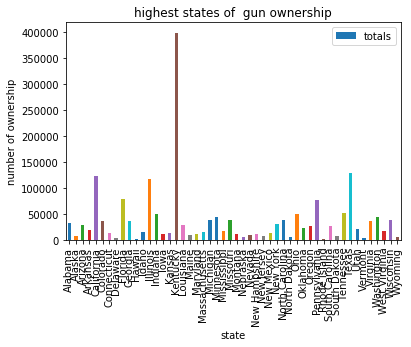

In [67]:
# here i want show a plot for all states 


gun017.plot( title='highest states of  gun ownership', x='state', y='totals' , kind='bar');
plt.ylabel('number of ownership')

The answar for the first question 


- the first Kentucky


- the second Texas


- the third  California

### What is the most gun type purchaesd in 2017?

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
gun017.head()

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   

   multiple  admin  prepawn_handgun   ...    returned_other  rentals_handgun  \
0       317    0.0             15.0   ...               0.0              0.0   
1       160    0.0              5.0   ...               0.0              0.0   
2       631    0.0             13.0   ...               0.0              0.0   
3       366   51.0             12.0   ...               0.0              0.0   
4         0    0.0              0.0   ...               0.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  

[5 rows x 27 columns]

In [36]:
# i want see the sum of the guns type

gun017['handgun'].sum()

477315.0

In [30]:
gun017['long_gun'].sum()

417126.0

In [31]:
gun017['other'].sum()

26897.0

In [32]:
gun017['multiple'].sum()

17612

In [41]:
gun = ['handgun', 'long_gun', 'other', 'multiple']
purchases = [477315, 417126,26897,17612]

In [42]:
f = np.arange(len(gun))
f

array([0, 1, 2, 3])

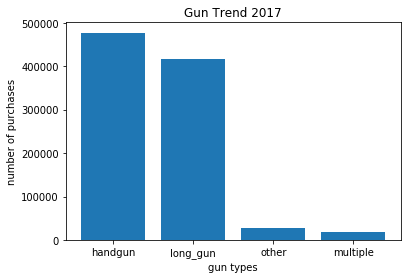

In [44]:
# i will show a plot for the trend gun in 2017

plt.xticks(f, gun)
plt.ylabel('number of purchases')
plt.xlabel('gun types')
plt.title('Gun Trend 2017')
plt.bar(f, purchases )
plt.legend()

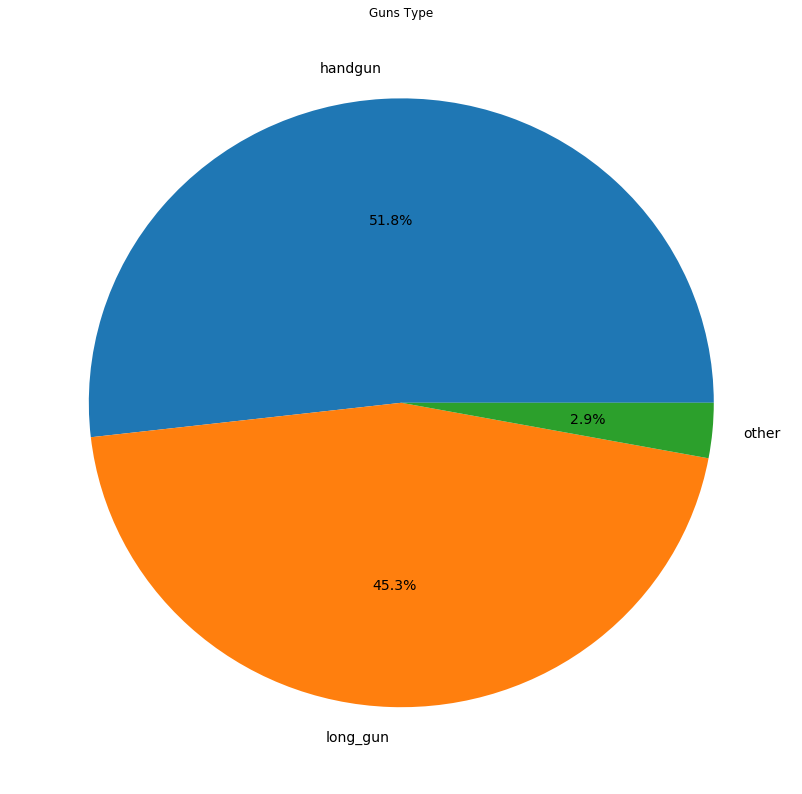

In [71]:
guns_type = gun017.loc[:,'handgun':'other'].sum()
guns_type.plot.pie(autopct='%1.1f%%', title="Guns Type", label="",
                  fontsize=14, figsize=(14,14));

### The answer for the second question


## in 2017 the handgun is the most gun purchased and came in the second the long_gun

<a id='conclusions'></a>
## conclusions
my conclusion is I found the Kentucky has the highest gun owner ship and there is a big different btween the Kentucky and the other states , were the hand gun is most type of guns be purchased with 51.8% 


## limitation
i dont found that much of proplems with my project but theres one thing that i see when i was working , the colonies are not included in census data so i needed to drop it from the gun data 

## Submitting your Project 


https://viewe617827b.udacity-student-workspaces.com/view/Investigate_a_Dataset.html

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0